# TP : accréditation anonyme et coloration de graphe

Ce TP va consister à accréditer une personne d’un droit sur la base d’une démonstration de capacité à colorer un graphe sans divulguer la coloration choisie.

In [1]:
from typing import NamedTuple
import hashlib
import random

import matplotlib.pyplot as plt
import networkx as nx

## Partie 1

Dans cette première partie, on crée une structure de données représentant un graphe coloré par sa matrice d’adjacence et la coloration de ses nœuds.

Ensuite, on définit une fonction générant aléatoirement les couleurs des sommets, puis générant avec une chance sur deux une arête entre les deux sommets considérés s’ils sont d’une couleur différente, et construisant un objet `Graphe` avec ces informations.
En tant que prouveur, on peut générer le graphe que l’on souhaite.

In [2]:
COULEURS = ("red", "green", "blue")


class Graphe(NamedTuple):
    matrice_adjacence: list[list[int]]
    coloriage: list[str]

    def __len__(self):
        return len(self.coloriage)


def generer_graphe_3coloriable(n: int):
    # Étape 1 : Assigner une couleur aléatoire à chaque noeud
    coloriage = [random.choice(COULEURS) for _ in range(n)]

    # Étape 2 : Générer la matrice d'adjacence
    matrice_adjacence = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            if coloriage[i] != coloriage[j]:
                # Relie les noeuds avec une probabilité de 1/2
                tirage = random.random()
                if tirage < 0.5:
                    # La matrice d'adjacence est symétrique
                    matrice_adjacence[i][j] = 1
                    matrice_adjacence[j][i] = 1

    return Graphe(matrice_adjacence, coloriage)


def afficher_graphe(graphe: Graphe):
    G = nx.Graph()
    for i in range(len(graphe)):
        G.add_node(i, color=graphe.coloriage[i])

    for i in range(len(graphe)):
        for j in range(i + 1, len(graphe)):
            if graphe.matrice_adjacence[i][j] == 1:
                G.add_edge(i, j)

    pos = nx.spring_layout(G)
    node_colors = [G.nodes[node]["color"] for node in G.nodes]

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, font_color='white')
    plt.title("Graphe 3-Coloriable")
    plt.show()

Nombre de noeuds : 20
Matrice d'adjacence du graphe :
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1]
[1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0]
[0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1]
[1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1]
[0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 

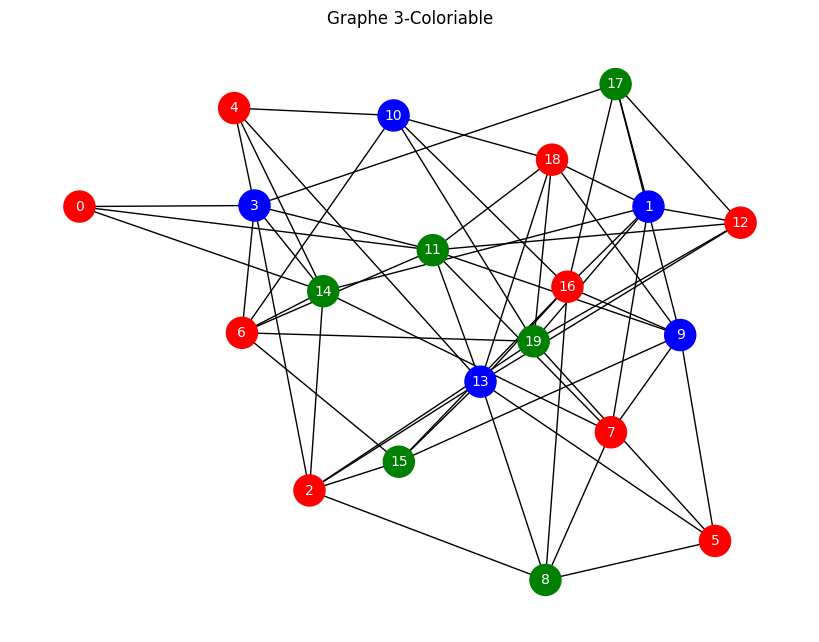

In [3]:
# Exemple d'utilisation

# Construit un graphe de 20 noeuds
N = 20
graphe = generer_graphe_3coloriable(N)

# Afficher les informations du graphe
print("Nombre de noeuds :", len(graphe))

print("Matrice d'adjacence du graphe :")
for ligne in graphe.matrice_adjacence:
	print(ligne)

print("Tableau des couleurs :")
print(graphe.coloriage)

# Afficher le graphe avec les couleurs correspondantes
afficher_graphe(graphe)

## Partie 2

Ensuite, on va devoir démontrer au vérificateur que l’on est en mesure de colorer ce graphe avec seulement trois couleurs en divulguant la structure du graphe sans dévoiler la coloration choisie.

Pour cela, on va construire pour chaque nœud une valeur permettant de vérifier la validité de la coloration du graphe sans en révéler la couleur. Ces valeurs ne doivent donc pas permettre de retrouver la couleur avec laquelle elles ont été construites. Une possibilité d’implémentation est, par exemple, de hacher par une fonction $h$ la concaténation de la couleur du sommet $c_i$ avec une valeur aléatoire $r_i$ tirée une seule fois pour chacun. On écrira donc $y_i = h(r_i||c_i)$.

In [4]:
def hacher(ci, ri):
	# Calcule l'empreinte de la concaténation de ri et ci avec la fonction de hachage choisie
	return hashlib.sha1(bytes(str(ri) + str(ci), encoding="ascii")).hexdigest()


def permutation_couleurs(coloriage: list[str]):
	couleurs_melangees = list(COULEURS)
	random.shuffle(couleurs_melangees)
	return [couleurs_melangees[COULEURS.index(couleur)] for couleur in coloriage]


class GageColoriage(NamedTuple):
	ci: list[int]
	ri: list[int]
	yi: list[int]

	def get(self, i: int):
		return self.ci[i], self.ri[i], self.yi[i]


def mise_en_gage_coloriage(coloriage: list[str]):
	# Liste des numéros des couleurs ci des noeuds
	ci = [COULEURS.index(couleur) for couleur in coloriage]

	# Liste des valeurs aléatoires ri des noeuds
	ri = [random.randrange(0, 2 ** 128) for _ in range(len(coloriage))]

	# Liste des empreintes des noeuds
	# Pour chaque noeud, calcule son empreintes cryptographique yi à partir de ci et ri
	yi = [hacher(ci[i], ri[i]) for i in range(len(coloriage))]

	return GageColoriage(ci, ri, yi)

In [5]:
# Exemple d'utilisation

# Crée une permutation des couleurs du graphe
coloriage = permutation_couleurs(graphe.coloriage)

# Construit une mise en gage
gage_coloriage = mise_en_gage_coloriage(coloriage)
gage_coloriage.yi

['a0282199afe81279da2203713378387a96103e90',
 '1e46597616d076f34a547a1c154168873e6156d2',
 'c4734291393ef4dca26c1d7df478d22b8e016961',
 'e0ede1498576a591e8eff192ece869429daf6ba5',
 '087867a251ec106fb29a25ec59491165f78438c9',
 '4dac4e37bb6bc70ccd5b23505541517dacd4bb0d',
 'eacbdf4f71d92fae278b160e23521034569f8750',
 '926a2b597cd9b874d97a38be397aa3032d3cf33d',
 '51bc812944106ac9c0aeb5c48bea779ad1d56c4c',
 'f9e9cd091f0a046f1a82b75323352cef54fd208a',
 'a6d65b0a44398d9d225e55a43aa5992724c2d92b',
 '5968c14652749bb6b02fcf88aa7e24d51bd6cb38',
 '1da45a42e4e77011b2d383f2bf1d85963da31f63',
 '368202b69a3f4d977325bfa9761001bfdc3352b4',
 'edcccf8f502340562eea54040ab7699c68a9e018',
 '1d8542272448db4336ca1bfc84b4d08d3bad4a01',
 '943b493307f1538e2b240ab3da4824c852b9cb77',
 'd77739cda4978adbc8fa98aeb66d1b70cfa59e1e',
 '440f809a883a7487baba82c9be945776b8bf85db',
 'e89423a016a2051e0801baebb4d42bf732eb8675']

## Partie 3

Enfin, pour démontrer au vérificateur notre capacité à colorer le graphe, on va lui fournir la matrice d’adjacence et la liste des empreintes $y_i$ de chaque sommet. Celui-ci va alors nous demander de fournir les valeurs $c_k$ et $r_k$ de deux sommets $i$ et $j$ adjacents de la matrice. Il va vérifier que les couleurs $c_i$ et $c_j$ soient bien différentes mais permettent de reconstruire les mêmes empreintes cryptographiques avec $r_i$ et $r_j$. On va répéter cette opération un grand nombre de fois en permutant les couleurs et en produisant une nouvelle mise en gage à chaque fois.

Si au bout de toutes ces tentatives, le vérificateur n’est pas parvenu à nous mettre en échec, il reconnaitra notre capacité à colorer le graphe avec trois couleurs.

In [6]:
def preuve_coloriage(matrice_adjacence: list[list[int]], mise_en_gage: GageColoriage):
    # i est un sommet quelconque
    i = random.randrange(len(matrice_adjacence))
    # j est un sommet voisin à i tiré au hasard
    j = random.choice([k for k, v in enumerate(matrice_adjacence[i]) if v == 1])

    # Récupère les valeurs associées à i et j
    ci, ri, yi = mise_en_gage.get(i)
    cj, rj, yj = mise_en_gage.get(j)
    if not (ci != cj and yi == hacher(ci, ri) and yj == hacher(cj, rj)):
        return False

    return True

In [7]:
# Exemple d'utilisation

# Vérifie à de nombreuses reprises que la coloration est valide
# À chaque tour de boucle, l'utilisateur produit une nouvelle coloration par permutation et crée une mise en gage que le vérificateur va mettre à l’épreuve
for _ in range(400):
	coloriage = permutation_couleurs(graphe.coloriage)
	gage_coloriage = mise_en_gage_coloriage(coloriage)
	assert preuve_coloriage(graphe.matrice_adjacence, gage_coloriage)

## Partie 4

### Question 1

Dans ce protocole, l’utilisateur au vérificateur envoie une mise en gage des couleurs (après une permutation aléatoire) des nœuds du graphe. Le vérificateur choisit ensuite deux nœuds reliés par une arête et demande les valeurs de mise en gage correspondantes. Si l’utilisateur est honnête et possède un véritable 3-coloriage du graphe, il pourra créer une mise en gage lui permettant de fournir les bonnes valeurs pour les nœuds demandés sans jamais produire de réponse invalide, et le vérificateur devra accepter la preuve s’il est lui aussi honnête (et ne demande pas à fournir de réponse pour deux sommets non adjacents).

### Question 2

Si le prouveur n’est pas en mesure de fournir un 3-coloriage valide, il pourrait mettre en gage un coloriage aléatoire. Si le vérificateur ne réalise qu’une seule vérification et que l’utilisateur répond correctement par chance, il n’aura pas la garantie que l’utilisateur sait vraiment réaliser un 3-coloriage. Il doit donc réaliser plusieurs vérifications car plus le nombre d’itérations de vérification augmente, plus la chance que l’utilisateur réponde correctement au hasard diminue, et les chances qu’a l’utilisateur de tromper le vérificateur sont par conséquent très faibles.

Par ailleurs, si l’utilisateur ne sait pas produire de 3-coloriage, le fait de mettre en gage au préalable la coloration l’empêche de modifier sa réponse lors de la demande du vérificateur. En effet, les valeurs de mise en gage générées étant des empreintes de hachage, il est extrêmement improbable qu’il parvienne à produire des nouvelles valeurs $c_k$ et $r_k$ afin que $c_i$ et $c_j$ soient différents tout en respectant la mise en gage.

### Question 3

Dans ce protocole, le vérificateur ne connait que les valeurs de mise en gage et les couleurs des nœuds qu’il demande. Il n’obtient aucune information sur les couleurs des autres nœuds, et les valeurs de la mise en gage ne lui permettent pas de retrouver les couleurs choisies en raison des valeurs $r_k$ aléatoires qui lui sont inconnues. Par conséquent, le protocole maintient la confidentialité de la coloration tout en garantissant que le fait que l’utilisateur connait un 3-coloriage valide.